# 05 - Convolutional Neural Network (CNN)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [8]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
print(test_images.shape, test_labels.shape)

(10000, 32, 32, 3) (10000, 1)


In [10]:
# Normalize data: 0,255 -> 0,1
train_images, test_images = train_images/255.0, test_images/255.0

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

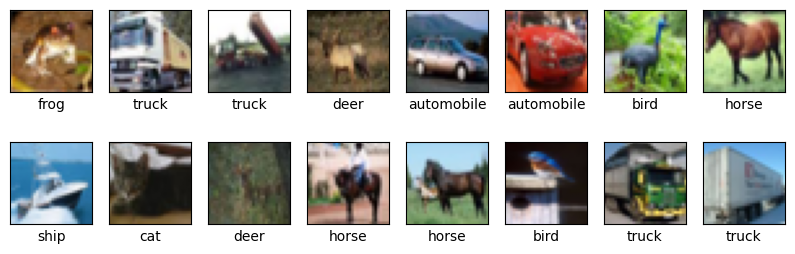

In [17]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(6,8,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [24]:
# Model
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides = (1,1), padding = "valid", activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation = "relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [25]:
# Loss and Optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [26]:
#Training
batch_size = 64
epochs = 5

model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
782/782 - 55s - loss: 1.6212 - accuracy: 0.4157 - 55s/epoch - 70ms/step
Epoch 2/5
782/782 - 56s - loss: 1.2918 - accuracy: 0.5418 - 56s/epoch - 71ms/step
Epoch 3/5
782/782 - 53s - loss: 1.1634 - accuracy: 0.5944 - 53s/epoch - 68ms/step
Epoch 4/5
782/782 - 60s - loss: 1.0760 - accuracy: 0.6261 - 60s/epoch - 77ms/step
Epoch 5/5
782/782 - 52s - loss: 1.0165 - accuracy: 0.6446 - 52s/epoch - 66ms/step


In [27]:
# evaluate
model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

157/157 - 4s - loss: 1.0237 - accuracy: 0.6517 - 4s/epoch - 23ms/step


[1.0237144231796265, 0.6517000198364258]

In [28]:
# Prediction
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
]) 

In [51]:
predictions = probability_model(test_images)
pred0 = predictions[0]
print(pred0)
print(class_names[test_labels[0][0]])

tf.Tensor(
[0.01305273 0.00121915 0.02161781 0.6917181  0.01561127 0.18787491
 0.01739824 0.0027631  0.04065178 0.00809279], shape=(10,), dtype=float32)
cat


In [46]:
# Another way 
# model + softmax
predictions = model(test_images) # model.predict(x_test, batch_size = batch_size) can also be done like this
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(class_names[label0])

tf.Tensor(
[0.01305273 0.00121915 0.02161781 0.6917181  0.01561127 0.18787491
 0.01739824 0.0027631  0.04065178 0.00809279], shape=(10,), dtype=float32)
cat


In [53]:
pred05s = predictions[0:5]
print(pred05s.shape)

label05s = np.argmax(pred05s, axis=1)
for i in range(5):
    print(class_names[i])

(5, 10)
airplane
automobile
bird
cat
deer


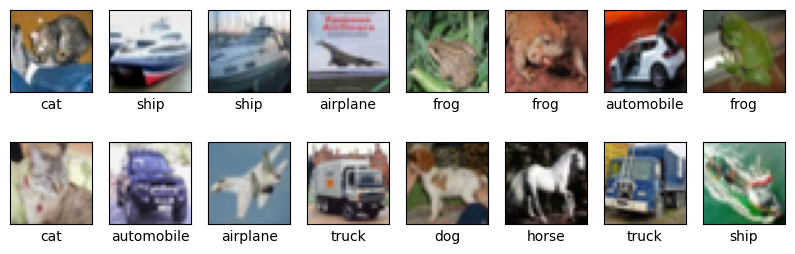

In [32]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(6,8,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[test_labels[i][0]])
    plt.show()

show()